<a href="https://colab.research.google.com/github/asepmuhidin/MK-Data-Mining-UPB/blob/main/impproved_model_c6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [6]:
df=pd.read_csv("https://raw.githubusercontent.com/asepmuhidin/MK-Data-Mining-UPB/main/dataset/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#Hapus data tidak relevan dan terlalu banyak null
columns_not_relevan=['PassengerId','Name','Ticket','Cabin']
df.drop(columns=columns_not_relevan, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
#Impute data Age dan Embarked
df.Age.fillna(df.Age.mean(), inplace=True)
df.Embarked.fillna('S', inplace=True)
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [10]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
#Label Encoding- Sex, Embarked
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

In [12]:
col_encode_label=['Sex','Embarked']
le=LabelEncoder()
df[col_encode_label]=df[col_encode_label].apply(lambda x:le.fit_transform(x))
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [13]:
#Splitting Fiture-Target
X=df.drop(columns=['Survived'])
y=df['Survived']

In [14]:
#Train-Test Splitting
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test, y_train,y_test=train_test_split(X,y, test_size=0.3, shuffle=y, random_state=42)

In [17]:
#Modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [18]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [19]:
#Evaluasi Model
akurasi=accuracy_score(y_test,y_pred)*100
presisi=precision_score(y_test,y_pred)*100
recall=recall_score(y_test,y_pred)*100

print(f'Akurasi :{akurasi}%')
print(f'Presisi :{presisi}%')
print(f'Recall :{recall}%')

Akurasi :70.52238805970148%
Presisi :68.6046511627907%
Recall :53.153153153153156%


In [20]:
# Improve model melalui scaling
scl=MinMaxScaler()
scl.fit(x_train)
x_train_scl=scl.transform(x_train)
x_test_scl=scl.transform(x_test)

In [38]:
knn_scl=KNeighborsClassifier()
knn_scl.fit(x_train_scl,y_train)
y_pred_scl=knn_scl.predict(x_test_scl)

In [39]:
#Evaluasi Model
akurasi_scl=accuracy_score(y_test,y_pred_scl)*100
presisi_scl=precision_score(y_test,y_pred_scl)*100
recall_scl=recall_score(y_test,y_pred_scl)*100

print(f'Akurasi Scaling :{akurasi_scl}%')
print(f'Presisi Scaling :{presisi_scl}%')
print(f'Recall Scaling :{recall_scl}%')

Akurasi Scaling :79.1044776119403%
Presisi Scaling :81.60919540229885%
Recall Scaling :63.96396396396396%


In [28]:
n=range(1,150,2)
score_train, score_test=[],[]

for k in n :
  model=KNeighborsClassifier(n_neighbors=k)
  model.fit(x_train_scl,y_train)
  score_train.append(model.score(x_train_scl,y_train))
  score_test.append(model.score(x_test_scl,y_test))


In [29]:
import matplotlib.pyplot as plt

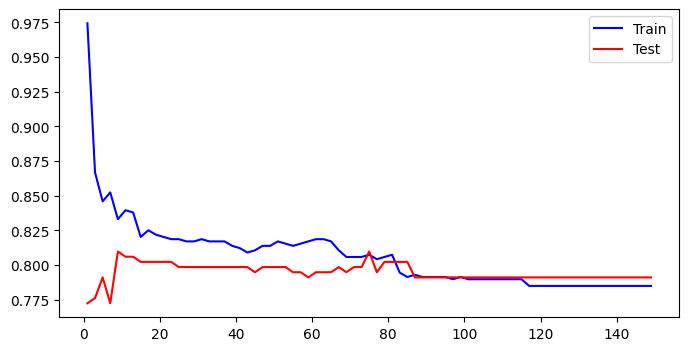

In [30]:
plt.figure(figsize=(8,4))
plt.plot(n,score_train, label='Train', color='b')
plt.plot(n,score_test, label='Test', color='r')
plt.legend()
plt.show()

In [31]:
max(score_test)

0.8097014925373134

In [32]:
import numpy as np

In [35]:
k_best=n[np.argmax(score_test)]
k_best

9